In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import preprocessing

# Read data

In [45]:
test_df=pd.read_csv(r'Data\Raw\merchants_test.csv', sep=';')
train_df=pd.read_csv(r'Data\Raw\merchants_train.csv', sep=';')
transactions_df=pd.read_csv(r'Data\Raw\transactions.csv', sep=',')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   merchant_id  6482 non-null   int64  
 1   latitude     6482 non-null   float64
 2   longitude    6482 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 152.0 KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   merchant_id  3524 non-null   int64  
 1   latitude     0 non-null      float64
 2   longitude    0 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 82.7 KB


In [47]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249353 entries, 0 to 249352
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   merchant_id            249353 non-null  int64  
 1   latitude               249353 non-null  float64
 2   longitude              249353 non-null  float64
 3   real_transaction_dttm  249353 non-null  object 
 4   record_date            249353 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 9.5+ MB


# Visual analysis

<Axes: xlabel='merchant_id', ylabel='latitude'>

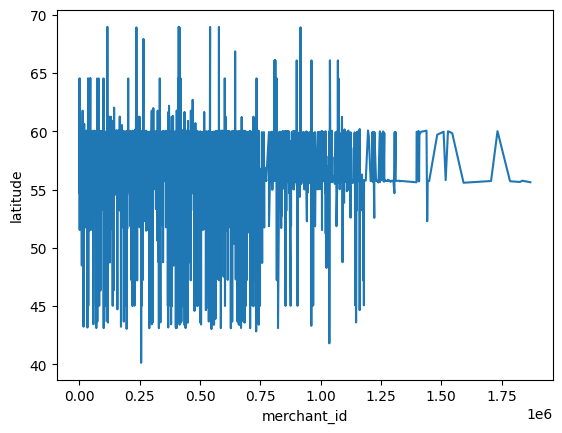

In [8]:
sns.lineplot(train_df, x='merchant_id', y='latitude')

<Axes: xlabel='merchant_id', ylabel='longitude'>

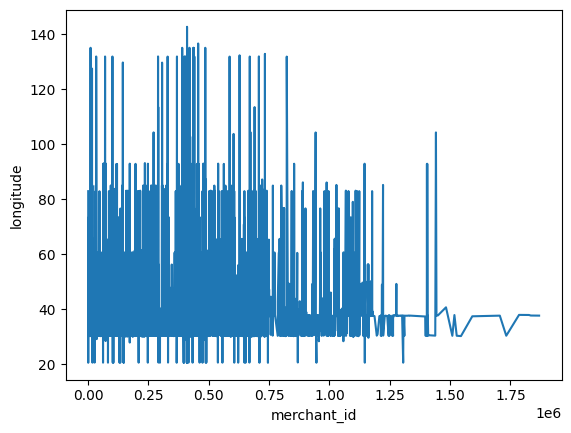

In [9]:
sns.lineplot(train_df, x='merchant_id', y='longitude')

<Axes: xlabel='merchant_id', ylabel='longitude'>

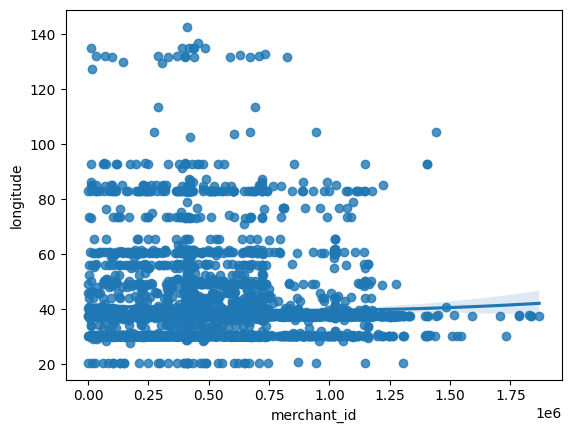

In [16]:
sns.regplot(train_df, x='merchant_id', y='longitude', order=2)

<Axes: xlabel='merchant_id', ylabel='latitude'>

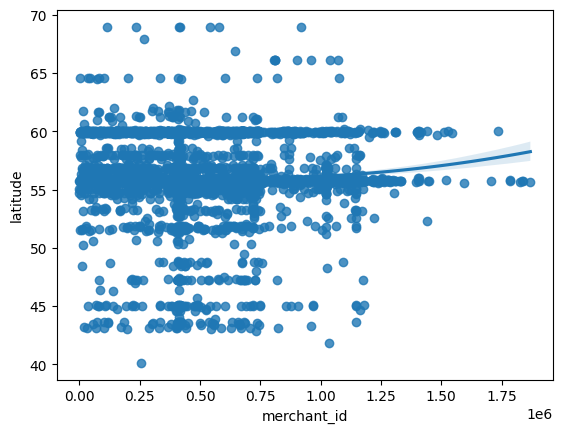

In [17]:
sns.regplot(train_df, x='merchant_id', y='latitude', order=2)

Визуально какая ли зависимость между id клиента и расположением торговой точкой отсутствует, что соответствует общим логическим представлениям о зависимостях.

# Correlation analysis

In [11]:
res = stats.spearmanr(train_df.merchant_id, train_df.longitude)
print(res)

SignificanceResult(statistic=0.015471527164265213, pvalue=0.21296256268991817)


In [12]:
res = stats.spearmanr(train_df.merchant_id, train_df.latitude)
print(res)

SignificanceResult(statistic=-0.07089088528187305, pvalue=1.1062702612727483e-08)


# Feature design

In [39]:
generalized_indicator=(train_df.latitude+90)*180+train_df.longitude
train_df['generalized_indicator']=generalized_indicator
test_df['generalized_indicator']=(test_df.latitude+90)*180+test_df.longitude

<Axes: xlabel='merchant_id', ylabel='generalized_indicator'>

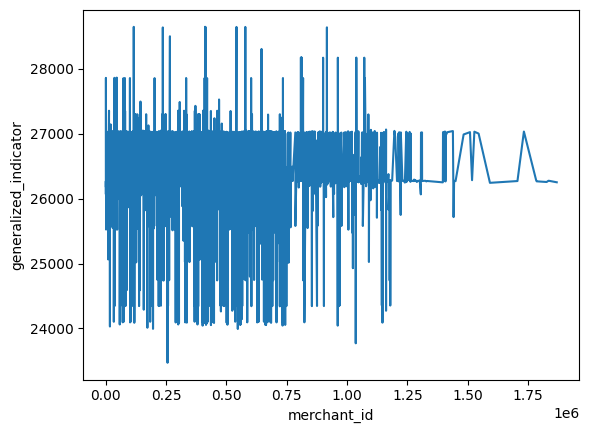

In [15]:
sns.lineplot(train_df, x='merchant_id', y='generalized_indicator')

<Axes: xlabel='merchant_id', ylabel='generalized_indicator'>

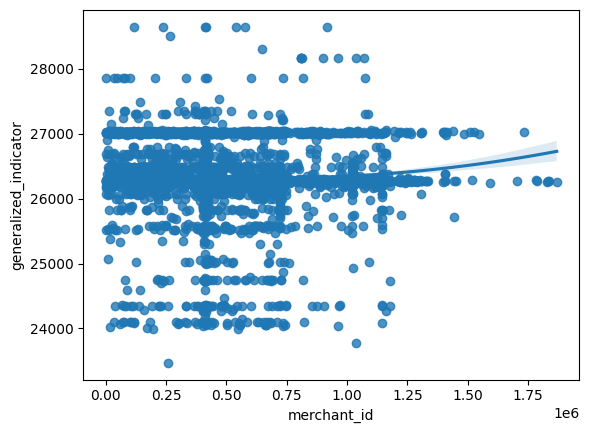

In [18]:
sns.regplot(train_df, x='merchant_id', y='generalized_indicator', order=2)

In [19]:
res = stats.spearmanr(train_df.merchant_id, train_df.generalized_indicator)
print(res)

SignificanceResult(statistic=-0.07240384037617617, pvalue=5.352280240631271e-09)


In [35]:
train_df['norm_gen_ind']=preprocessing.normalize(np.array(train_df.generalized_indicator).reshape(1, -1)).reshape(-1, 1)
train_df['norm_merchant_id']=preprocessing.normalize(np.array(train_df.merchant_id).reshape(1, -1)).reshape(-1, 1)

In [34]:
res = stats.spearmanr(train_df.merchant_id, train_df.norm_gen_ind)
print(res)

SignificanceResult(statistic=-0.07240384037617617, pvalue=5.352280240631271e-09)


In [37]:
res = stats.spearmanr(train_df.norm_merchant_id, train_df.norm_gen_ind)
print(res)

SignificanceResult(statistic=-0.07240384037617617, pvalue=5.352280240631271e-09)


<Axes: xlabel='norm_merchant_id', ylabel='norm_gen_ind'>

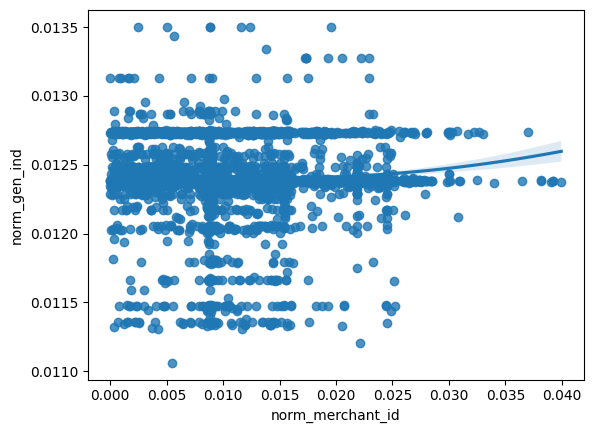

In [40]:
sns.regplot(train_df, x='norm_merchant_id', y='norm_gen_ind', order=2)

По результатам корреляционного анализа можно сделать вывод об отсутствии корреляции между id клиента и географическими координатами. Можно предположить, что коотдинаты в совокупности с временем транзации можно воспринимать как временной ряд и далее применять соответствующие методы прогнозирования. Однако для этого требуется обширный анализ. 